# Lab6: AI Forecast to optimise insulin recomendation
### Supporting Diabetes research:  

In this tutorial, you use the sample dataset for BigQuery.
## Objectives
In this tutorial, you will use AI Forecast to explore  data,  generate AI Forecast model  
https://dtc.ucsf.edu/types-of-diabetes/type1/treatment-of-type-1-diabetes/medications-and-therapies/type-1-insulin-therapy/calculating-insulin-dose/ 
https://medium.com/@richellechua/food-vision-calorie-intake-tracker-using-google-vision-api-and-firebase-a16c086ec882

# AI Forecast to explore time series model
+ Presentation can be found here: https://docs.google.com/presentation/d/1CnKuKsdUgb6fC8gKAmnzpxkZLeZC7sRPo_o6sj56-Lc/edit?resourcekey=0-M0J_clFVqmyY8sEYpFFAtA#slide=id.gd9277b5506_0_0


## Step 1: Explore Data
You can create GCP project and leverage public data set which provides free access to many datasets and free query processing. See more information [here](https://cloud.google.com/bigquery/public-data).

For our diabetes subset of data, let's examine data first:
+ Following query shows information about glucose variations.

In [4]:
# Read GCP project id from env.
shell_output=!gcloud config list --format 'value(core.project)' 2>/dev/null
GCP_PROJECT_ID=shell_output[0]
print("GCP project ID:" + GCP_PROJECT_ID)

GCP project ID:covid-19-271622


In [17]:
%%bigquery glucose --project $GCP_PROJECT_ID
SELECT 	DisplayTime, GlucoseValue  
FROM `covid-19-271622.diabetes.diabetes_insulin3`
WHERE subjectId ='2133-001' and GlucoseValue > 100 order by DisplayTime
LIMIT 10

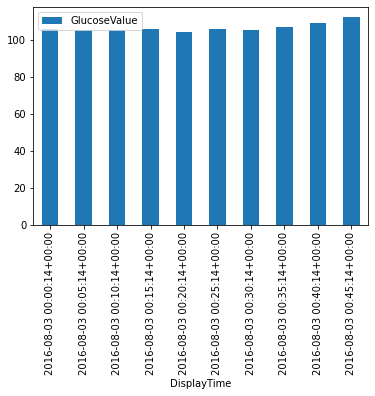

In [18]:
glucose.plot(kind='bar', x='DisplayTime', y='GlucoseValue');

## Step 2: Explore how food, physical activity and weather affect glucose variations.
You can create GCP project and leverage public data set which provides free access to many datasets and free query processing. See more information [here](https://cloud.google.com/bigquery/public-data).

We have to detect consumption of cards, fat and protein first:
+ Viaual AI can help to extract that information. https://cloud.google.com/vision/automl/object-detection/docs

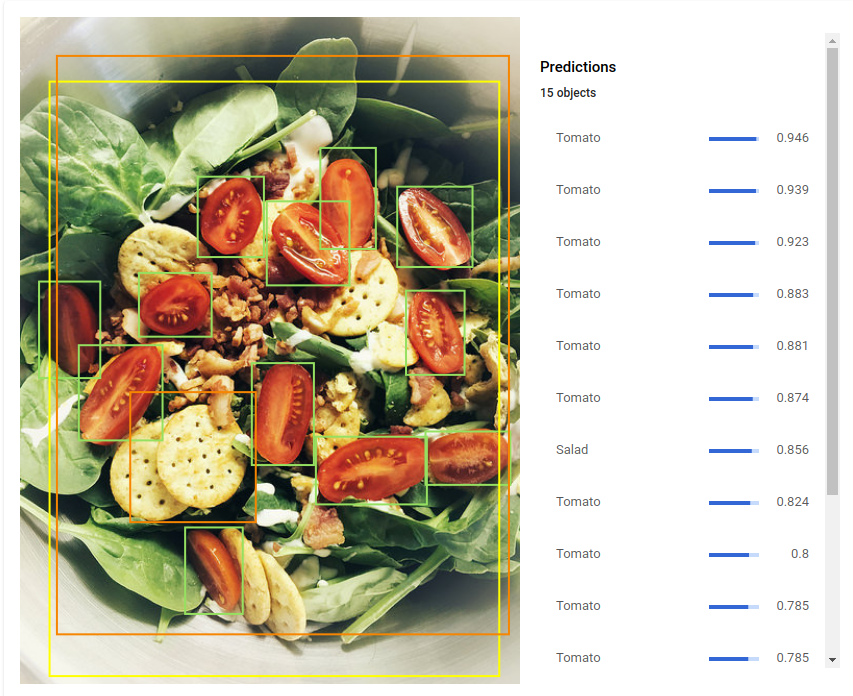

In [12]:
from IPython.display import Image
Image(filename='./FoodImage.png', width = 800, height = 400) 

In [19]:
from google.cloud import bigquery
client = bigquery.Client()

In [20]:
sql = """
SELECT * 
FROM `covid-19-271622.diabetes.diabetes_insulin3`
"""
df = client.query(sql).to_dataframe()
df.head()

,DisplayTime,GlucoseValue,subjectId,protein,carb,fat,insulin,temperature,humidity,pressure,time_str,activity
0,2015-09-27 03:13:03+00:00,109,1636-69-107,0,0,0,0,20.0,80.0,30.0,2015-09-27 03:13:03+00,0
1,2015-09-20 15:56:16+00:00,106,1636-69-111,0,0,0,0,20.0,80.0,30.0,2015-09-20 15:56:16+00,0
2,2015-09-16 01:13:10+00:00,99,1636-69-100,0,0,0,0,20.0,80.0,30.0,2015-09-16 01:13:10+00,0
3,2017-03-19 20:36:43+00:00,92,2133-020,0,0,0,0,20.0,80.0,30.0,2017-03-19 20:36:43+00,0
4,2015-10-13 10:48:45+00:00,108,1636-69-114,0,0,0,0,20.0,80.0,30.0,2015-10-13 10:48:45+00,0


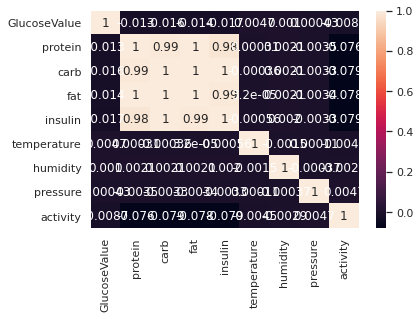

In [21]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
uniform_data = np.random.rand(10, 12)
sns.heatmap(df.corr(),annot=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


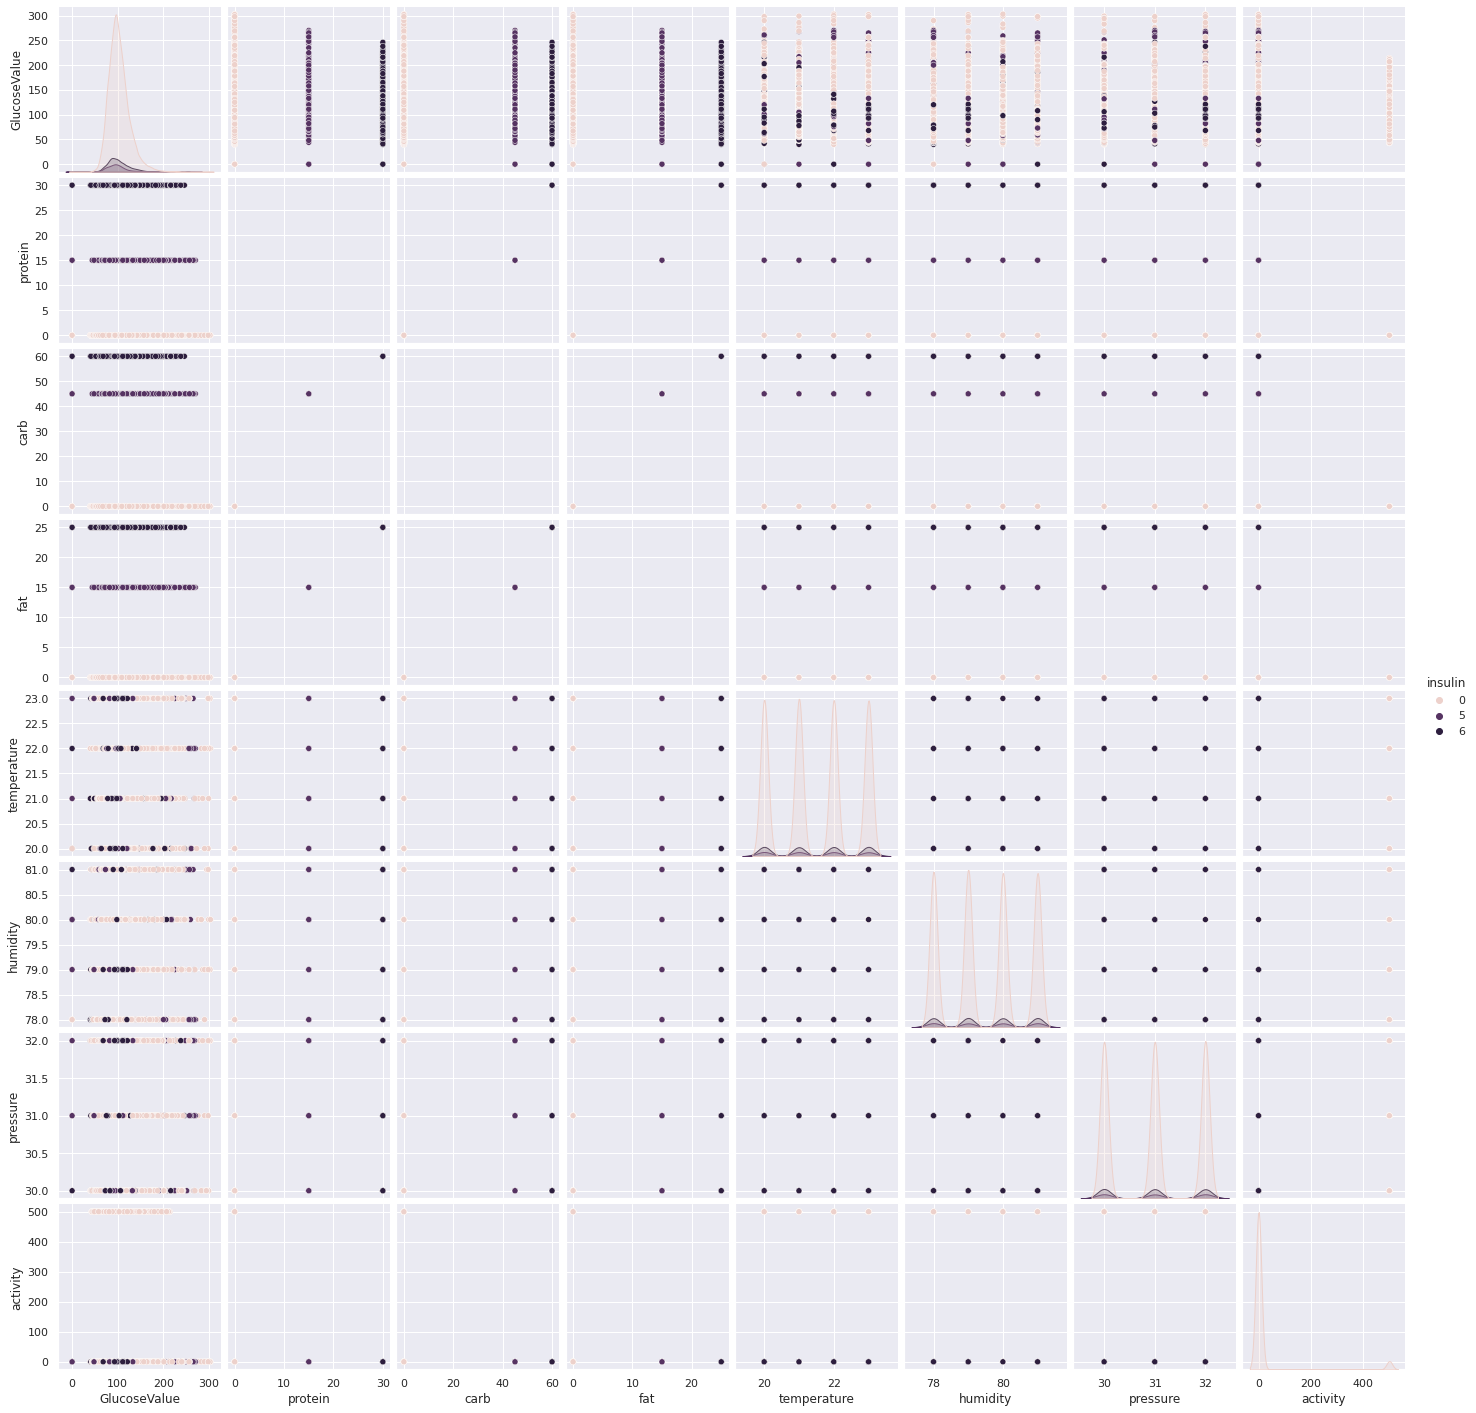

In [22]:
sns.pairplot(df,hue='insulin')


# Leverage AI Forecast to build the model: 

+ Vector AI console: https://pantheon.corp.google.com/vertex-ai/locations/us-central1/datasets/3620665401987301376/analyze?project=covid-19-271622

+ BQ https://pantheon.corp.google.com/bigquery?d=prediction_diabetes_insulin_2021566499_2021_05_07T10_53_21_885Z&p=covid-19-271622&page=table&t=predictions&project=covid-19-271622&ws=!1m35!1m4!4m3!1scovid-19-271622!2sdiabetes!3sdiabetes_insulin3!1m4!4m3!1scovid-19-271622!2sdiabetes!3sdiabetes_insulin_prescription!1m4!4m3!1scovid-19-271622!2sdiabetes!3sdiabetes_insulin3_predict!1m4!4m3!1scovid-19-271622!2sdiabetes!3spredict22!1m4!4m3!1scovid-19-271622!2sdiabetes!3spredict2!1m4!4m3!1scovid-19-271622!2sdiabetes!3spredict1!1m4!4m3!1scovid-19-271622!2sprediction_diabetes_insulin_2021566499_2021_05_07T10_53_21_885Z!3spredictions
...



Executing query with job ID: d3302b30-d14c-403f-98b1-b026d9964536
Query executing: 1247.62s

### It will take an hour to run

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.918101,0.814754,0.990113,0.825492,0.082136,0.987235


,roc_auc,model_quality
0,0.987235,good


# You can check vareous models explored by AI Forecast
+ AutoML keep [log](https://pantheon.corp.google.com/automl-tables/locations/us-central1/datasets/TBL8658818995480166400;modelId=TBL2508683113329065984;task=basic/train?project=covid-19-271622) of all model configurations it explored
+ [Models](https://pantheon.corp.google.com/logs/query;query=resource.type%3D%22cloudml_job%22%20resource.labels.job_id%3D%22TBL2508683113329065984%22%20resource.labels.project_id%3D%22covid-19-271622%22%20labels.log_type%3D%22automl_tables%22%20jsonPayload.%22@type%22%3D%22type.googleapis.com%2Fgoogle.cloud.automl.master.TablesModelStructure%22?project=covid-19-271622)
+ [Trials](https://pantheon.corp.google.com/logs/query;query=resource.type%3D%22cloudml_job%22%20resource.labels.job_id%3D%22TBL2508683113329065984%22%20resource.labels.project_id%3D%22covid-19-271622%22%20labels.log_type%3D%22automl_tables%22%20jsonPayload.%22@type%22%3D%22type.googleapis.com%2Fgoogle.cloud.automl.master.TuningTrial%22?project=covid-19-271622)


# Run Prediction  

Now that you have evaluated your model, the next step is to use it to predict outcomes.

+ https://docs.google.com/presentation/d/1CnKuKsdUgb6fC8gKAmnzpxkZLeZC7sRPo_o6sj56-Lc/edit?resourcekey=0-M0J_clFVqmyY8sEYpFFAtA#slide=id.gd9277b5506_0_0
